#PREDICCION PRECIOS DE CASAS
###Contamos con una base de datos pública sobre vivienda y desarrollaremos un modelo para seleccionar el tipo de vivienda más atractiva.


### 1- Análisis exploratorio
#####Esto es para tener una idea previda de como son los datos antes de decidir alguna técnica en particular.

In [ ]:
# Instalamos la librería SciKit-Learn
!pip install -U scikit-learn
!pip install basemap
!pip install basemap-data-hires

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.6/860.6 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 100.9 MB/s eta 0:00:00


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 MB 8.2 MB/s eta 0:00:00


In [ ]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
from sklearn.model_selection import train_test_split
from mpl_toolkits.basemap import Basemap
from pandas.plotting import scatter_matrix
import folium
from folium.plugins import HeatMap
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [ ]:
# Cargamos la base de datos en este caso desde GoogleDrive
from google.colab import files
from google.colab import drive # Le damos permiso a collab para que acceda a google drive
drive.mount('/content/drive')
ruta = "/content/drive/MyDrive/Practicante_Proteccion/home_data.csv" # cargamos la base de datos en un DataFrame de pandas
data = pd.read_csv(ruta)

Mounted at /content/drive


In [ ]:
# Nos damos una idea rápida de como es la base de datos
data.head()

id             date   price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900         3       1.00         1180   
1  6414100192  20141209T000000  538000         3       2.25         2570   
2  5631500400  20150225T000000  180000         2       1.00          770   
3  2487200875  20141209T000000  604000         4       3.00         1960   
4  1954400510  20150218T000000  510000         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [ ]:
# Ahora nos damos una idea de que tipo de datos estamos manejando
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
# Y posteriormente obtenemos unos estadísticos importantes sobre cada valor
data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

<Axes: xlabel='price', ylabel='Count'>

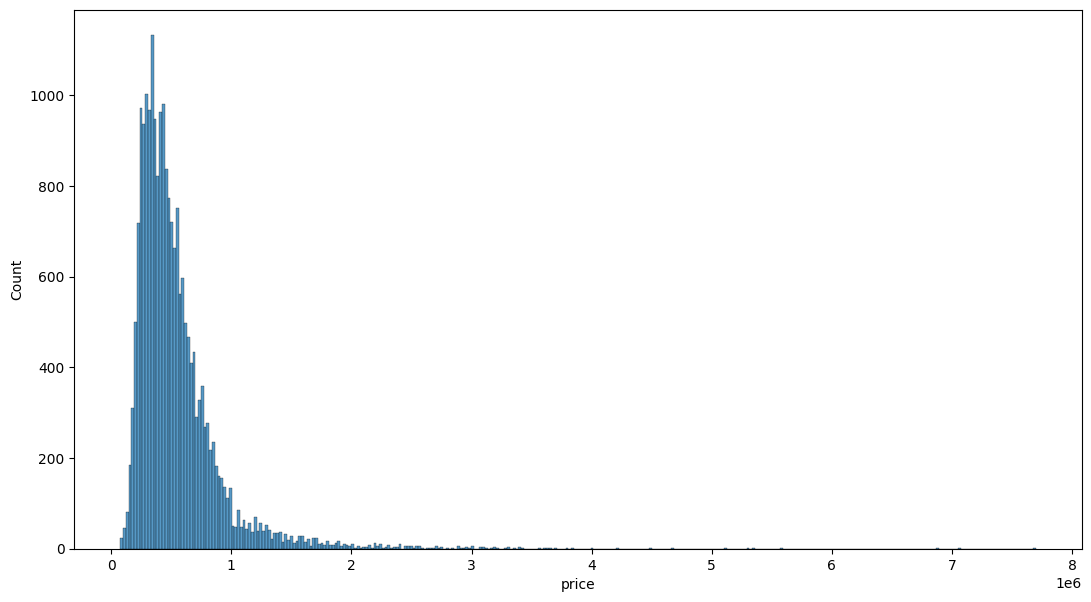

In [ ]:
# Observemos como se comportan los datos de la variable que queremos predecir en este caso, el precio de la vivienda
plt.figure(figsize=(13, 7))
sns.histplot(data['price'])

<Axes: ylabel='price'>

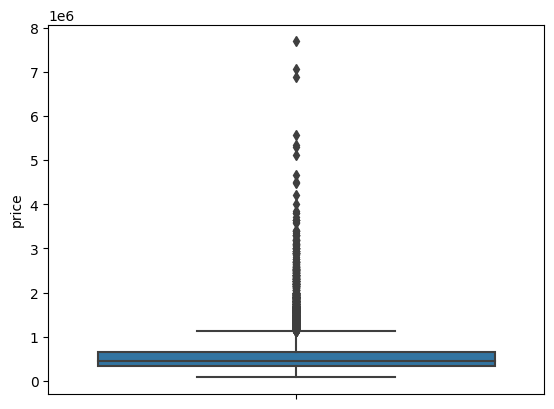

In [ ]:
# Y para visualizar mejor los datos una buena técnica es el uso de un diagrama de caja
sns.boxplot(data=data, y = 'price')

###Lo primero que podemos observar en el precio es que está sesgado hacia la izquierda, ya que vemos que hay una mayor frecuencia en los precios menores a 1000000. Estos valores se observan mejor en el diagrama de caja donde vemos que lo que están fuera del rango superior hacen parte de los datos atípicos, procedemos a limpiar esta variable para tener datos menos sesgados.

In [ ]:
# usamos la siguiente función para eliminar los valores atípicos
def delete_outliers(data, column):
  first_Q = data[column].quantile(0.25)
  third_Q = data[column].quantile(0.75)
  IQR = third_Q - first_Q
  data = data[~((data[column] < (first_Q - 1.5 * IQR)) | (data[column] > (third_Q + 1.5 * IQR)))]
  return data

<Axes: ylabel='price'>

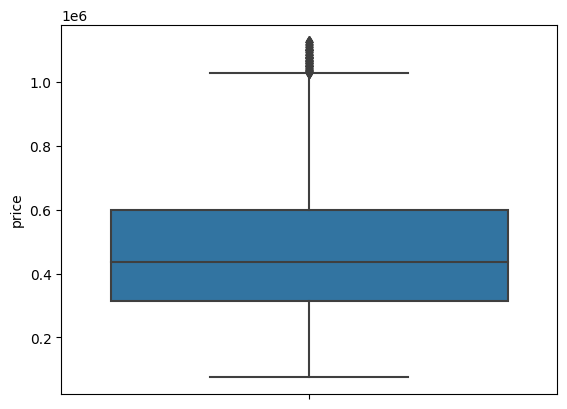

In [ ]:
sns.boxplot(data=delete_outliers(data,'price'), y = 'price')

<Axes: xlabel='price', ylabel='Count'>

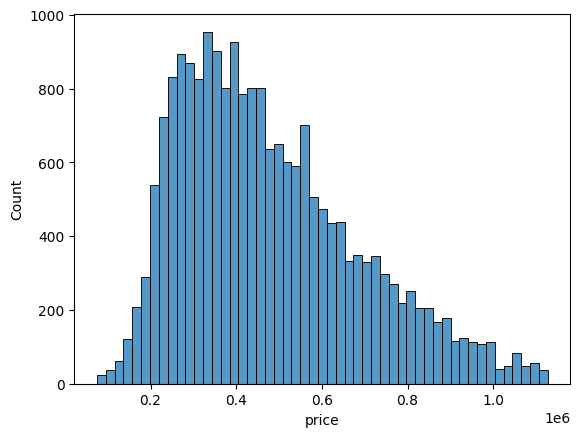

In [ ]:
sns.histplot(data=delete_outliers(data,'price'), x = 'price')

In [ ]:
# Vemos que al limpiar los outliers en la variable precio, obtenemos una distribución más normal.

In [ ]:
# guardamos los datos limpios en un nuevo dataset
data_clean = delete_outliers(data,'price')

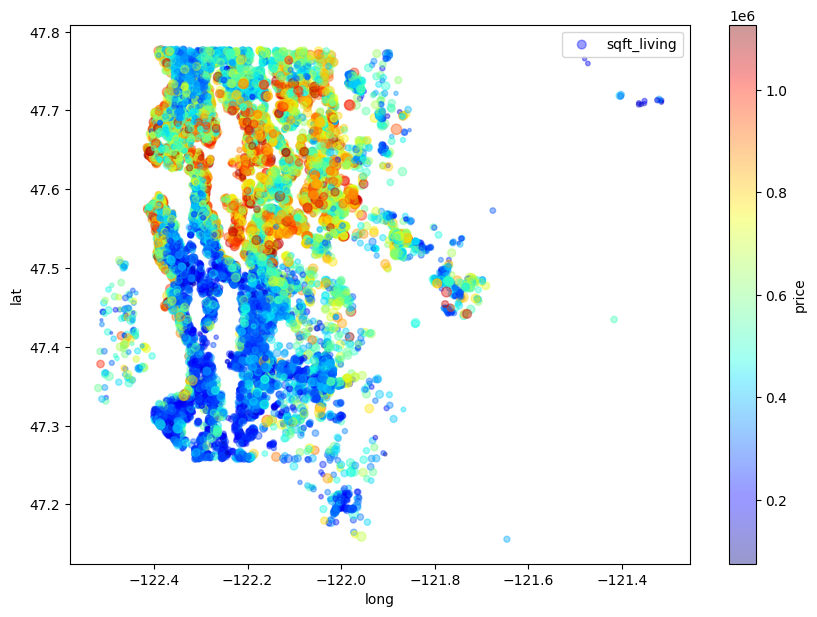

In [ ]:
data_clean.plot(kind="scatter", x="long", y="lat", alpha=0.4,
 s=data_clean["sqft_living"]/100, label="sqft_living", figsize=(10,7), #tamaño
 c="price", cmap=plt.get_cmap("jet"), colorbar=True, #color
)
plt.legend()

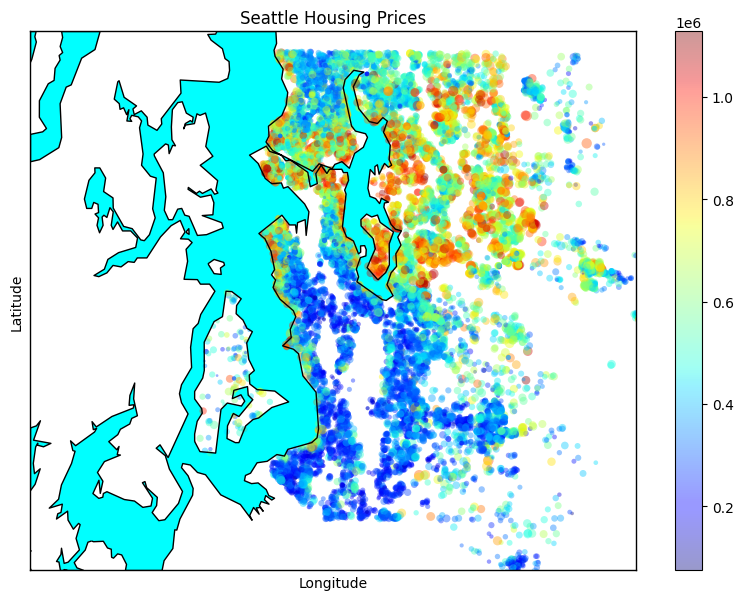

In [ ]:
from mpl_toolkits.basemap import Basemap

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10,7))

# Define the map bounds for Seattle
map = Basemap(projection='merc',
              lat_0=47.5, lon_0=-122.3,
              resolution = 'h',
              area_thresh = 0.1,
              llcrnrlon=-122.8, llcrnrlat=47.2,
              urcrnrlon=-121.8, urcrnrlat=47.8)

# Draw the map boundaries, coastlines, and fill the land with color
map.drawcoastlines()
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='white',lake_color='aqua')

# Convert the longitude and latitude coordinates to map coordinates
x, y = map(data_clean["long"].values, data_clean["lat"].values)

# Plot the data as a scatter plot with sqft_living as size and price as color
sc = ax.scatter(x, y, s=data_clean["sqft_living"]/100, c=data_clean["price"], alpha=0.4, cmap=plt.get_cmap("jet"), edgecolors='none')

# Add a colorbar and labels

plt.colorbar(sc)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Seattle Housing Prices')

# Show the plot
plt.show()


In [ ]:
import folium # Nos permite hacer mapas interactivos
from folium.plugins import HeatMap

# create a map centered on Seattle
seattle_map = folium.Map(location=[47.6062, -122.3321], zoom_start=10)

# create a colormap
colormap = folium.LinearColormap(colors=['green', 'yellow', 'red'], vmin=data_clean['price'].min(), vmax=data_clean['price'].max(), caption='Price')

# add markers to the map for each data point
for _, row in data_clean.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=row['sqft_living'] / 100,
        fill=True,
        fill_opacity=0.4,
        fill_color=colormap(row['price']),
        popup=f"Price: {row['price']}, Sqft: {row['sqft_living']}"
    ).add_to(seattle_map)

# add the colormap to the map
seattle_map.add_child(colormap)

# display the map
#seattle_map
seattle_map.save('king_county.html')

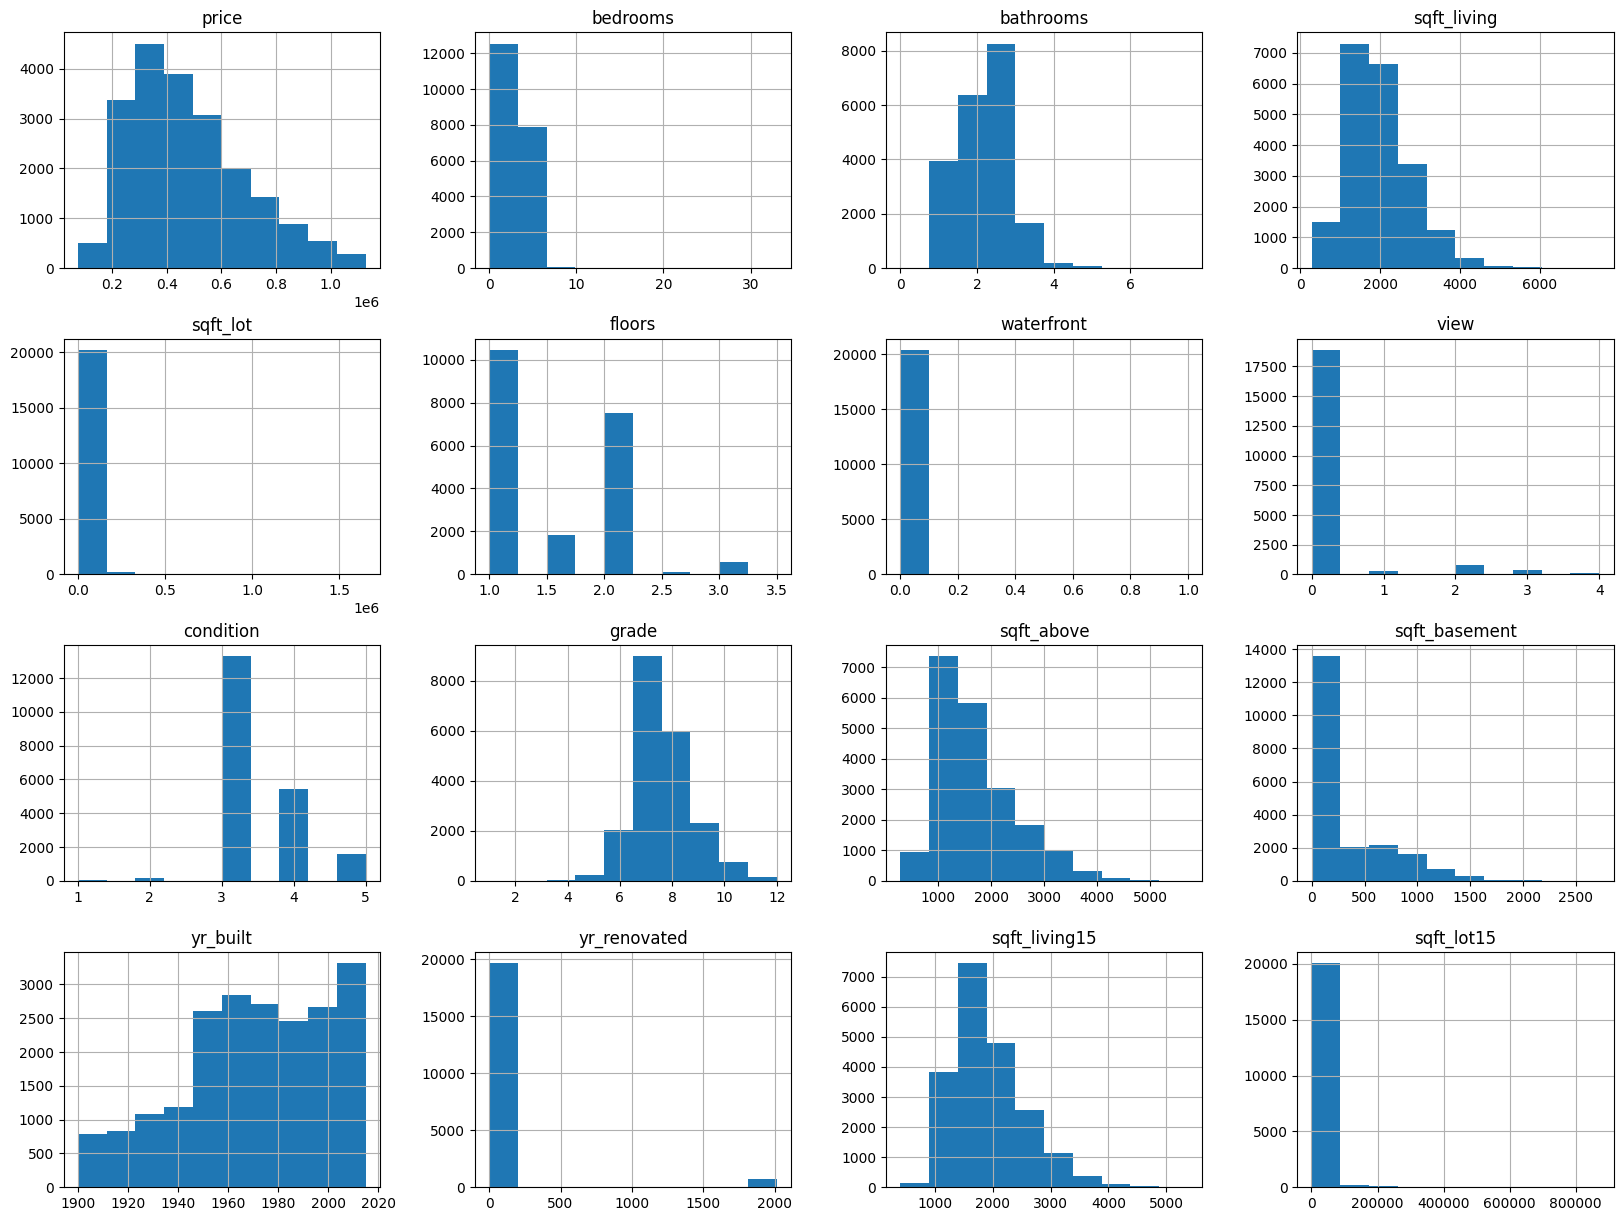

In [ ]:
# Analicemos los datos de manera visual
# Con una visión anterior de los datos tabulares se observan valores repetitivos en columnas como: bedrooms, bathrooms, floors, waterfront, view, condition y grade, queremos hacer un histograma de los atributos
# para ver como se comportan, omitimos en la visualización que son identificadores.
data_clean.drop(columns=['id','lat','long','zipcode']).hist(figsize=(20,15))
plt.show()

<Axes: ylabel='sqft_lot'>

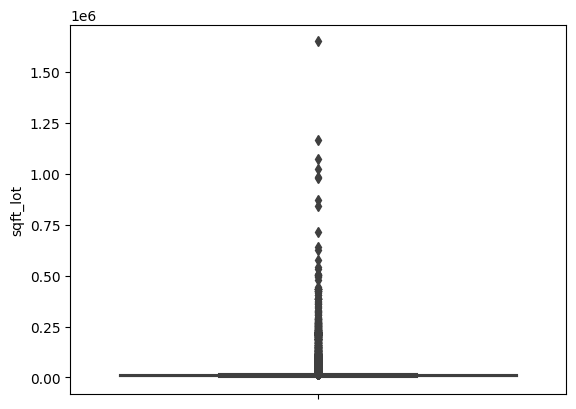

In [ ]:
sns.boxplot(data = data_clean, y = 'sqft_lot')

<Axes: ylabel='sqft_lot'>

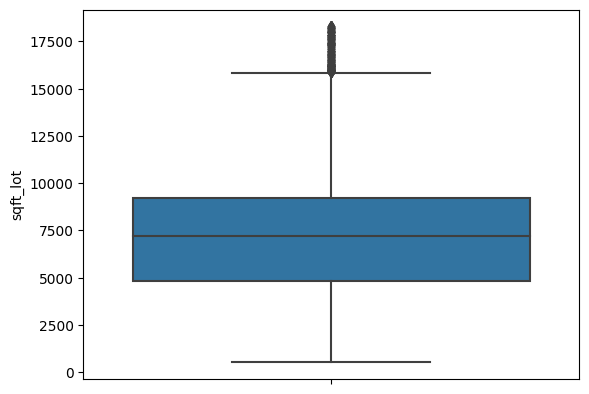

In [ ]:
sns.boxplot(data = delete_outliers(data_clean,'sqft_lot'), y = 'sqft_lot')

<Axes: ylabel='sqft_lot15'>

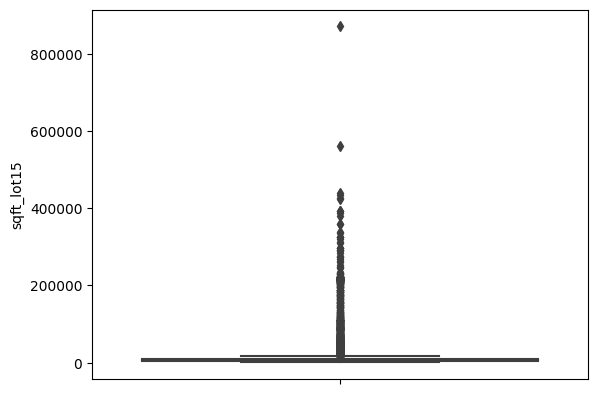

In [ ]:
sns.boxplot(data = data_clean, y = 'sqft_lot15')

<Axes: ylabel='sqft_lot15'>

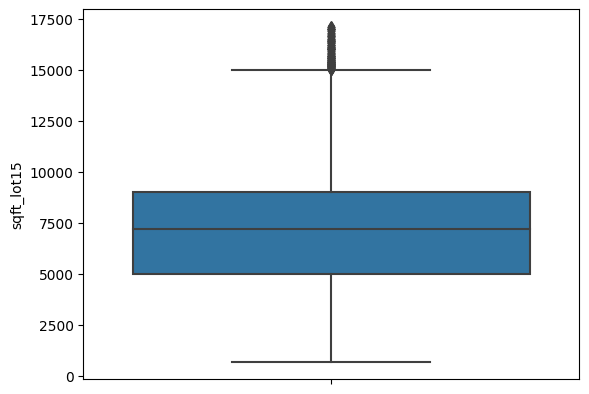

In [ ]:
sns.boxplot(data = delete_outliers(data_clean, 'sqft_lot15') , y = 'sqft_lot15')

### Observamos lo siguiente:
1. A Sqft_lot y Sqft_lot15 se le removerán sus outliers, ya que al observar la distribución vimos que hay un alto sesgo que puede llevar a que el modelo realice suposiciones incorrectas.
2. Al observar sqft_basement vemos que hay muchos que no poseen sótano, por lo que se propone crear una variable que indique si tiene sótano o no.
3. Vemos que la columna año de construcción podemos convertirla en información valiosa para el modelo, por lo que creamos la columna 'age' la cual es 2015 ( año en el que se recopilaron los datos ) - year_built.
4. Observamos que hay una variable que nos dice el año en el que fue renovado, y cero si no lo fue, por lo tanto creamos una nueva variable que se llame is_renovated para indicar si fue renovada la vivienda o no.

In [ ]:
# 1
data_clean = delete_outliers(data_clean, 'sqft_lot15')
data_clean = delete_outliers(data_clean, 'sqft_lot')

In [ ]:
# 2
data_clean.loc[data_clean['sqft_basement'] > 0, 'basement'] = 1
data_clean.loc[data_clean['sqft_basement'] == 0, 'basement'] = 0

In [ ]:
# 3
data_clean['age'] = 2015 - data_clean['yr_built']

In [ ]:
# 4
data_clean.loc[data_clean['yr_renovated'] > 0, 'is_renovated'] = 1
data_clean.loc[data_clean['yr_renovated'] == 0, 'is_renovated'] = 0

<Axes: ylabel='sqft_lot15'>

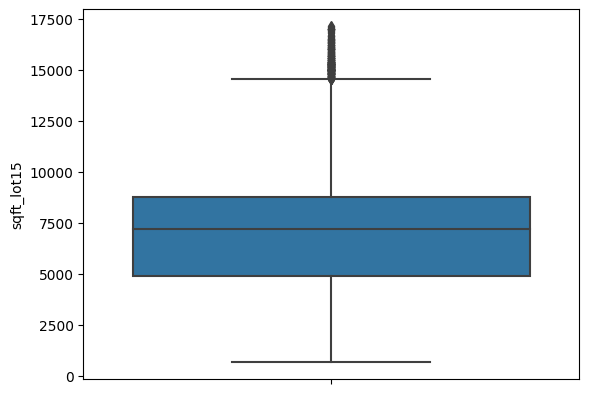

In [ ]:
sns.boxplot(data = data_clean, y = 'sqft_lot15')

<Axes: ylabel='sqft_lot'>

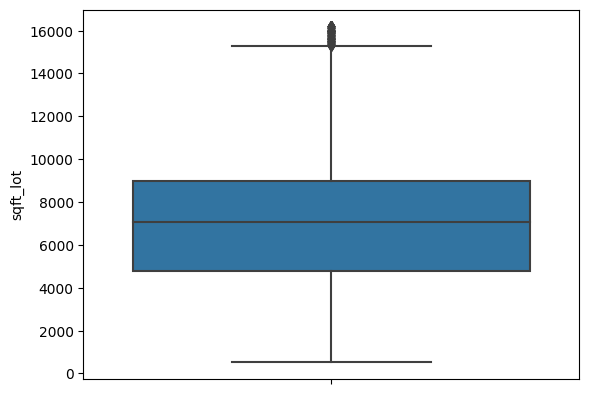

In [ ]:
sns.boxplot(data = data_clean, y = 'sqft_lot')

In [ ]:
pd.set_option('display.max_columns', None) # Así mostramos todas las columnas
data_clean.head()

id             date   price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900         3       1.00         1180   
1  6414100192  20141209T000000  538000         3       2.25         2570   
2  5631500400  20150225T000000  180000         2       1.00          770   
3  2487200875  20141209T000000  604000         4       3.00         1960   
4  1954400510  20150218T000000  510000         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  basement  age  is_renovated  
0           1340        5650       0.0   60           0.0  
1           1690        7639       1.0   64           1.0  
2           2720        8062       0.0   82           0.0  
3           1360        5000       1.0   50           0.0  
4           1800        7503       0.0   28           0.0

In [ ]:
# Eliminamos las columnas que no nos interesan
data_clean = data_clean.drop(columns = ['id','date', 'zipcode', 'sqft_basement', 'yr_built', 'yr_renovated'])

In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17806 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          17806 non-null  int64  
 1   bedrooms       17806 non-null  int64  
 2   bathrooms      17806 non-null  float64
 3   sqft_living    17806 non-null  int64  
 4   sqft_lot       17806 non-null  int64  
 5   floors         17806 non-null  float64
 6   waterfront     17806 non-null  int64  
 7   view           17806 non-null  int64  
 8   condition      17806 non-null  int64  
 9   grade          17806 non-null  int64  
 10  sqft_above     17806 non-null  int64  
 11  lat            17806 non-null  float64
 12  long           17806 non-null  float64
 13  sqft_living15  17806 non-null  int64  
 14  sqft_lot15     17806 non-null  int64  
 15  basement       17806 non-null  float64
 16  age            17806 non-null  int64  
 17  is_renovated   17806 non-null  float64
dtypes: flo

In [ ]:
data_clean.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  1.780600e+04  17806.000000  17806.000000  17806.000000  17806.000000   
mean   4.664799e+05      3.311300      2.027266   1903.874986   7009.165225   
std    2.038916e+05      0.915205      0.704661    722.274697   3212.394807   
min    8.000000e+04      0.000000      0.000000    370.000000    520.000000   
25%    3.100000e+05      3.000000      1.500000   1370.000000   4800.000000   
50%    4.250000e+05      3.000000      2.000000   1800.000000   7056.000000   
75%    5.860000e+05      4.000000      2.500000   2340.000000   9000.000000   
max    1.127000e+06     33.000000      7.500000   7350.000000  16200.000000   

             floors    waterfront          view     condition        grade  \
count  17806.000000  17806.000000  17806.000000  17806.000000  17806.00000   
mean       1.479557      0.001348      0.149051      3.405313      7.46518   
std        0.544718      0.036689      0.588403      0.647977      0.97096   
min        1.000000      0.000000      0.000000      1.000000      3.00000   
25%        1.000000      0.000000      0.000000      3.000000      7.00000   
50%        1.000000      0.000000      0.000000      3.000000      7.00000   
75%        2.000000      0.000000      0.000000      4.000000      8.00000   
max        3.500000      1.000000      4.000000      5.000000     12.00000   

         sqft_above           lat          long  sqft_living15    sqft_lot15  \
count  17806.000000  17806.000000  17806.000000   17806.000000  17806.000000   
mean    1643.270246     47.561039   -122.228379    1859.503538   6943.592497   
std      679.335535      0.137646      0.133248     581.005087   2971.853961   
min      370.000000     47.155900   -122.503000     620.000000    651.000000   
25%     1150.000000     47.476300   -122.337000    1440.000000   4889.250000   
50%     1460.000000     47.570350   -122.267000    1750.000000   7176.000000   
75%     1990.000000     47.680175   -122.151000    2180.000000   8750.000000   
max     5370.000000     47.777600   -121.315000    5380.000000  17136.000000   

           basement           age  is_renovated  
count  17806.000000  17806.000000   17806.00000  
mean       0.384646     44.813546       0.03555  
std        0.486525     30.094755       0.18517  
min        0.000000      0.000000       0.00000  
25%        0.000000     17.000000       0.00000  
50%        0.000000     43.000000       0.00000  
75%        1.000000     65.000000       0.00000  
max        1.000000    115.000000       1.00000

<Axes: xlabel='view', ylabel='price'>

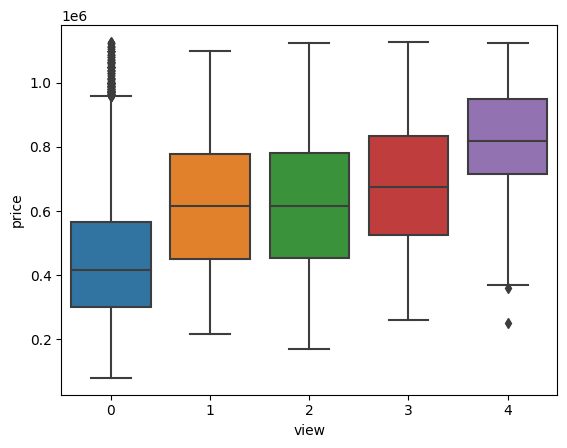

In [ ]:
# Vamos a ver los boxplot de los atributos
sns.boxplot(x = 'view', y = 'price', data = data_clean)

Podemos observar que cuando la vista es mayor a 0 su precio tiende a aumentar, además de que las medianas de 1 y 2 se encuentran muy similares, luego de 3 las medianas aumentan.

<Axes: xlabel='floors', ylabel='price'>

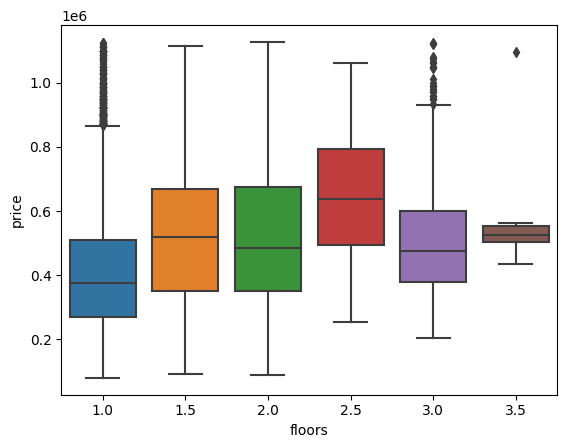

In [ ]:
sns.boxplot(x = 'floors', y = 'price', data = data_clean)

In [ ]:
data_clean['floors'].value_counts()

1.0    9102
2.0    6451
1.5    1583
3.0     569
2.5      94
3.5       7
Name: floors, dtype: int64

Vemos que en 3.5 pisos hay poca cantidad de datos, comparado con el resto de la data ya que pueden ser outliers en esa data.

In [ ]:
data_clean = data_clean[data_clean['floors'] < 3.5 ]

<Axes: xlabel='waterfront', ylabel='price'>

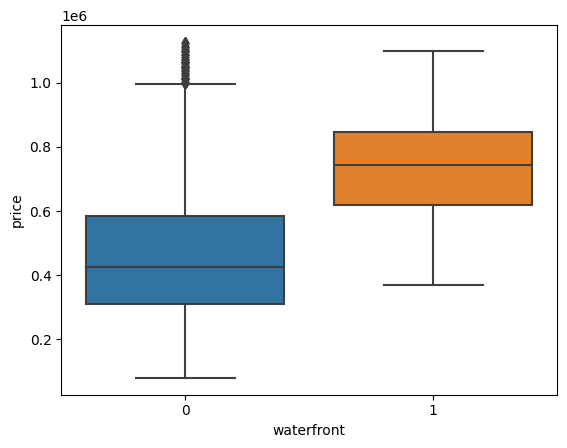

In [ ]:
sns.boxplot(x = 'waterfront', y = 'price', data = data_clean)

Vemos que efectivamente las casas con vista al mar, tienden a tener un precio mayor.

<Axes: xlabel='grade', ylabel='price'>

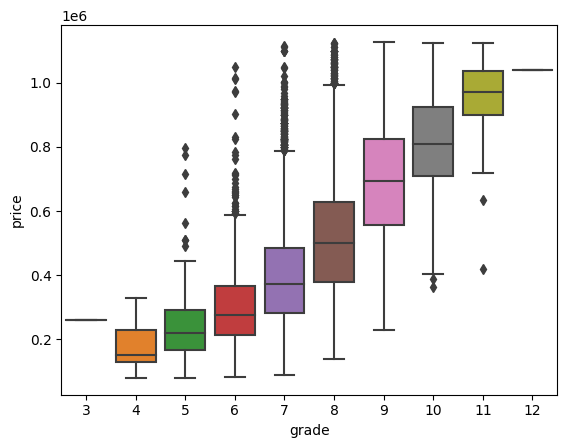

In [ ]:
sns.boxplot(x = 'grade', y = 'price', data = data_clean)

In [ ]:
data_clean['grade'].value_counts()

7     8209
8     5185
6     1831
9     1816
10     487
5      188
11      64
4       17
12       1
3        1
Name: grade, dtype: int64

Vemos que hay poca densidad en valores menores a 4 y mayores a 11, por lo que procedemos a remover dichos valores.

In [ ]:
data_clean = data_clean[ (data_clean['grade'] > 3) & (data_clean['grade'] < 12)  ]

<Axes: xlabel='bathrooms', ylabel='price'>

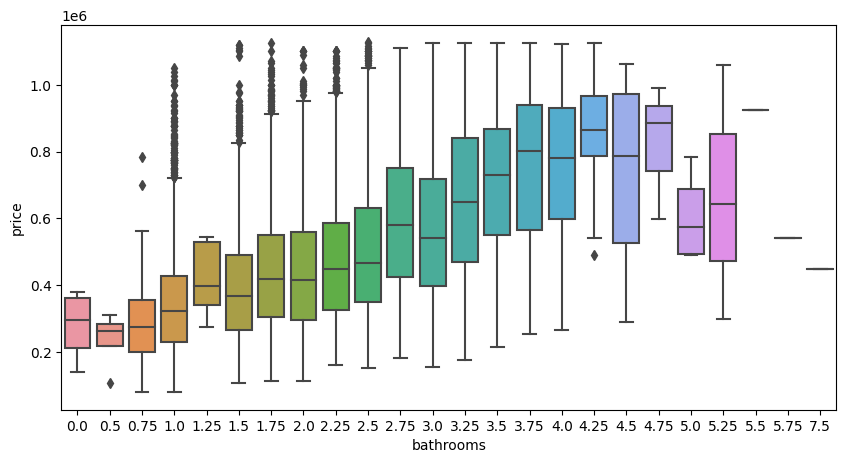

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x = 'bathrooms', y = 'price', data = data_clean, ax=ax)

In [ ]:
data_clean['bathrooms'].value_counts()

2.50    4467
1.00    3526
1.75    2608
2.00    1694
2.25    1681
1.50    1313
2.75     920
3.00     558
3.50     440
3.25     336
3.75      68
4.00      55
0.75      45
4.50      40
4.25      18
1.25       7
5.00       4
0.50       4
0.00       4
4.75       3
5.25       3
7.50       1
5.50       1
5.75       1
Name: bathrooms, dtype: int64

Para valores menores a 1 y mayores a 4 tenemos datos que podrían inducir ruido en el modelo, por lo cual los agrupamos en la categoria siguiente más cercana.

In [ ]:
data_clean.loc[data_clean['bathrooms'] > 4, 'bathrooms'] = 4
data_clean.loc[data_clean['bathrooms'] < 1, 'bathrooms'] = 1

<Axes: xlabel='bathrooms', ylabel='price'>

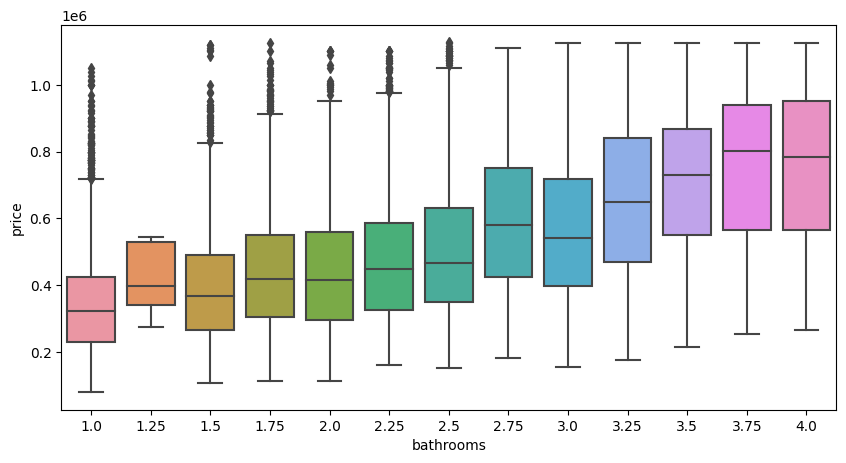

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x = 'bathrooms', y = 'price', data = data_clean, ax=ax)

Al agrupar estos datos en su número de baños más cercanos observamos un patrón en los datos de a medida que más baños se tengan la mediana y el precio tiende a aumentar.

<Axes: xlabel='bedrooms', ylabel='price'>

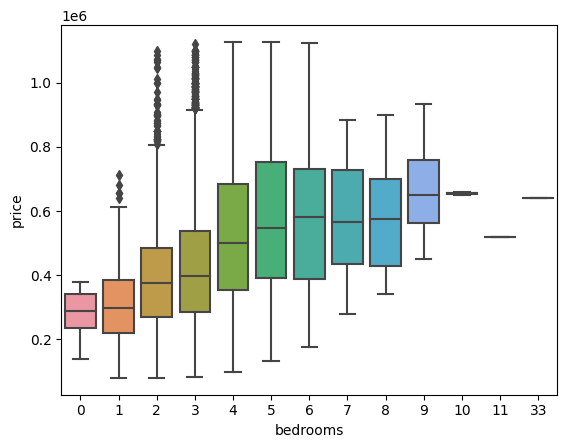

In [ ]:
sns.boxplot(x = 'bedrooms', y = 'price', data = data_clean)

In [ ]:
data_clean['bedrooms'].value_counts()

3     8398
4     5364
2     2503
5     1131
6      189
1      163
7       23
8        9
0        9
9        4
10       2
11       1
33       1
Name: bedrooms, dtype: int64

Observamos la distribución de las habitaciones vs el precio y notamos que hay un valor atípico de 33, procedemos a eliminarlo y observando la frecuencia de habitaciones también vemos que más de 10 habitaciones no tiene una muestra significativa de datos, por lo que también los eliminamos.

In [ ]:
data_clean = data_clean[data_clean['bedrooms'] < 10]

<Axes: xlabel='bedrooms', ylabel='price'>

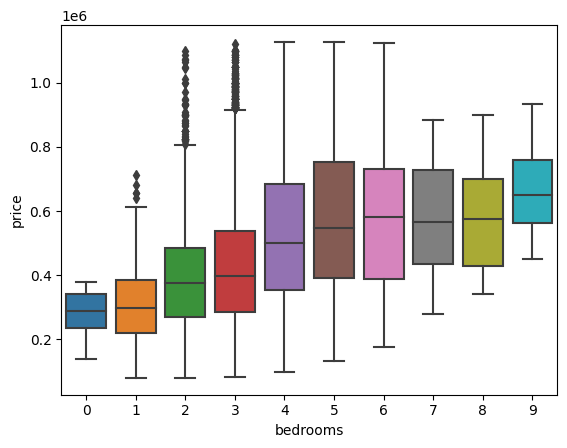

In [ ]:
sns.boxplot(x = 'bedrooms', y = 'price', data = data_clean)

Vemos que a medida que aumentan las habitaciones el precio comienza a aumentar y se estabiliza luego de 5 habitaciones.

<Axes: xlabel='condition', ylabel='price'>

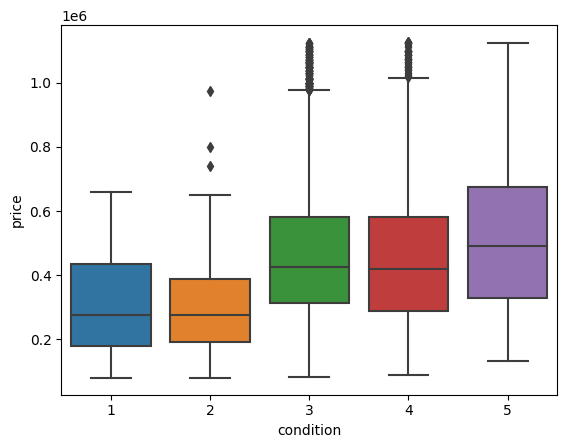

In [ ]:
sns.boxplot(x = 'condition', y = 'price', data = data_clean)

Observamos que las casa con condición 1 y 2 tienen a costar menos, y a partir de 3 las casas cuestan más con las medianas 3 y 4 un poco más estabilizados entre sí.
Ahora con los datos limpios procedemos a ver las correlaciones entre nuestras variables.

In [ ]:
# Calcularemos ahora las correlaciones para ver como cada atributo se correlaciona con el precio de la vivienda
corr_matrix = data_clean.corr()
corr_matrix['price'].sort_values(ascending=False)

price            1.000000
grade            0.605539
sqft_living      0.595967
sqft_living15    0.531477
sqft_above       0.488604
lat              0.453206
bathrooms        0.426903
bedrooms         0.292522
floors           0.261197
view             0.248924
basement         0.186793
is_renovated     0.097875
condition        0.050386
waterfront       0.050141
long             0.032638
sqft_lot        -0.014900
age             -0.018991
sqft_lot15      -0.023568
Name: price, dtype: float64

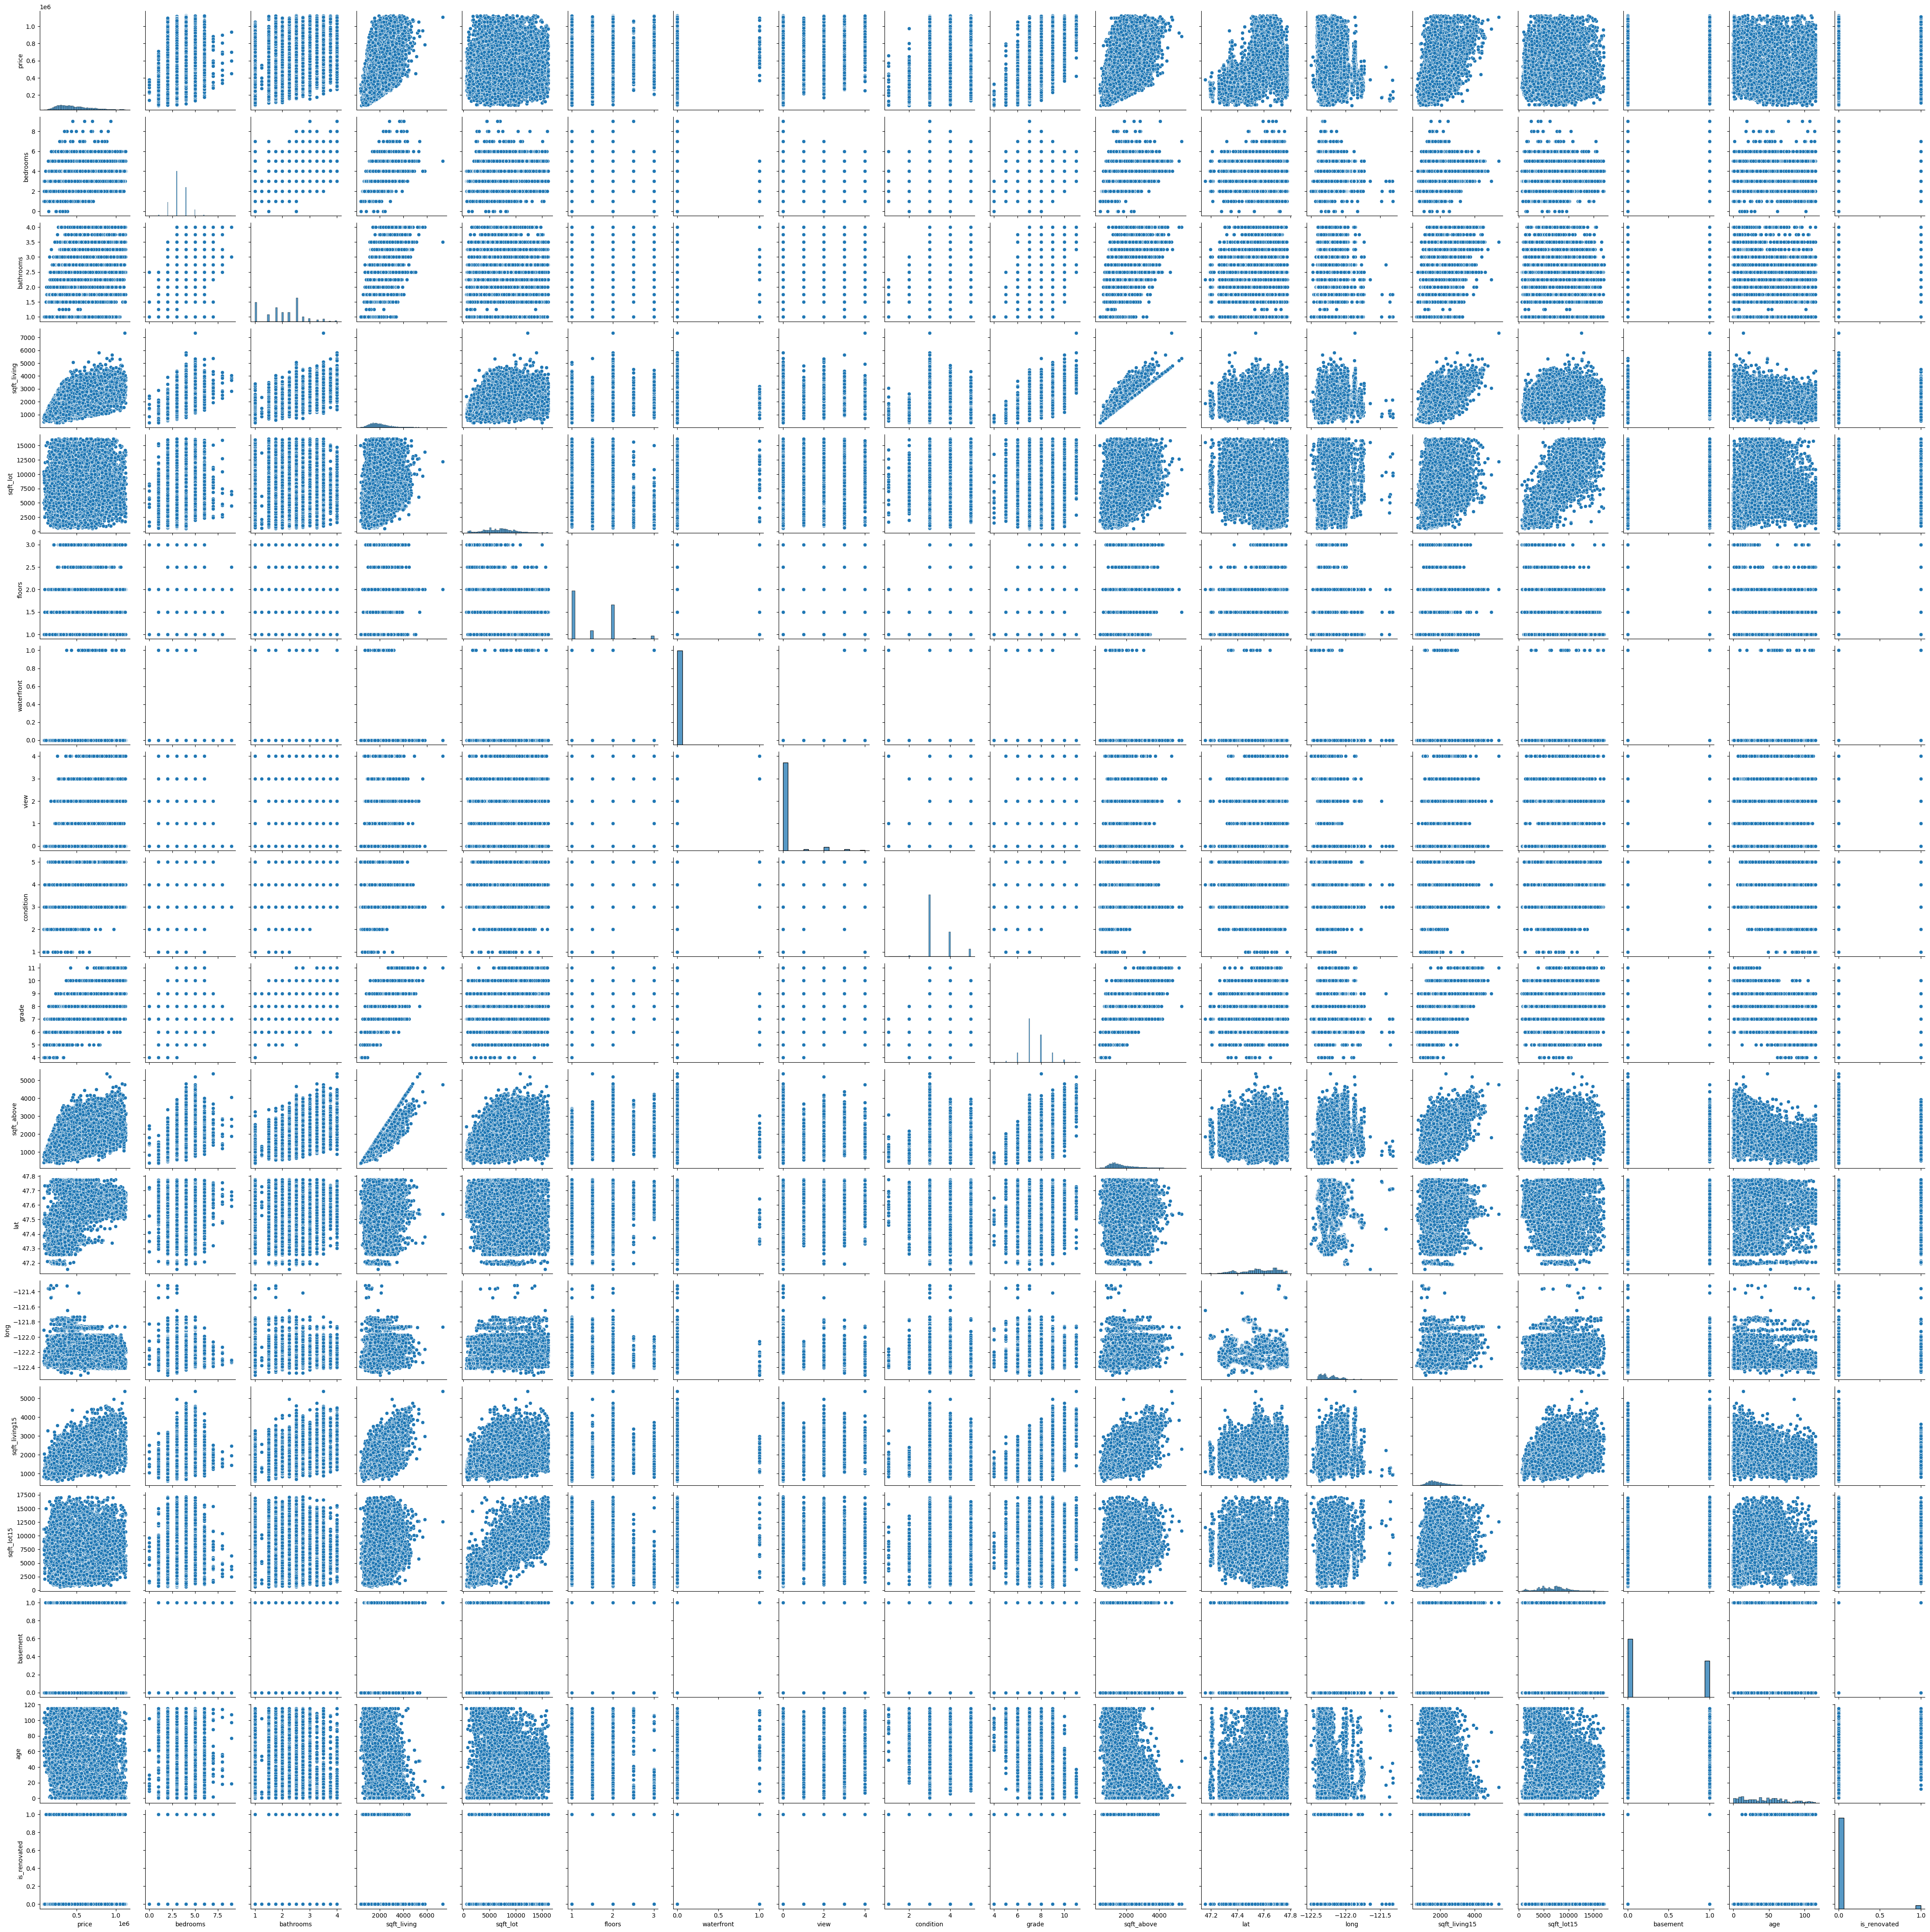

In [ ]:
sns.pairplot(data=data_clean)
# Show the plot
plt.show()

<Axes: xlabel='age', ylabel='price'>

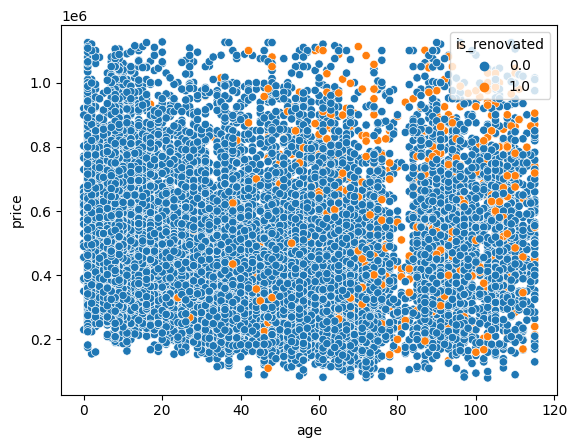

In [ ]:
sns.scatterplot(data=data_clean,x='age', y='price', hue='is_renovated') #Estas dos gráficas nos dieron una idea sobre las relaciones entre variables, pero todavía no eliminaremos ninguna.

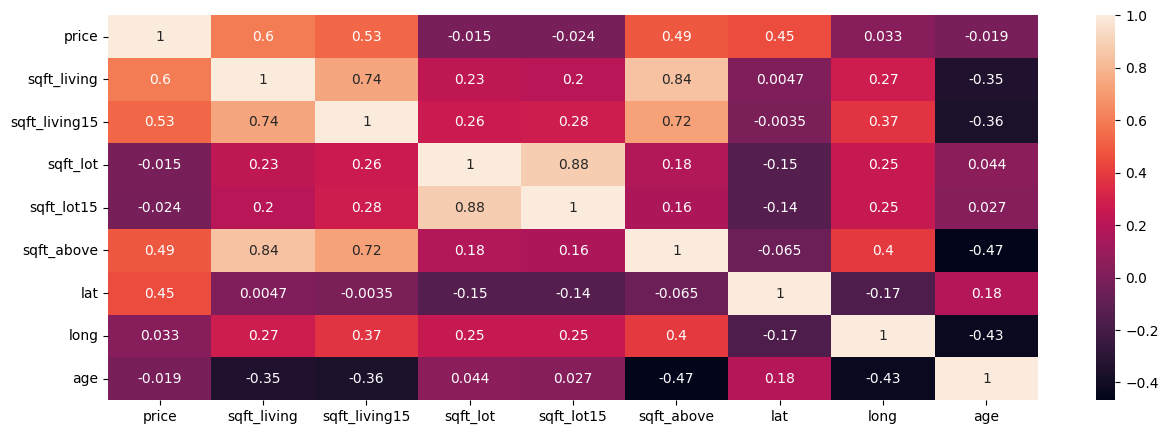

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(data_clean[['price', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15','sqft_above', 'lat', 'long', 'age']].corr(), annot=True, ax= ax)
plt.show()

Al observar la matriz de correlaciones, vemos que las variables sqft_living15 y sqft_living tienen una correlación positiva bastante alta por lo que se plantea eliminar sqft_living15, porque posee una alta correlación con otras covariables. Sqft_living y sqft_above tienen también una alta correlación positiva de 0.84, sabemos que sqft_above también tienen una alta correlación con otras covariables, por lo que se decide eliminarla. Lo que nos plantea la correlación entre los pares sqft_lot y sqft_lot15, sqft_living y sqft_living15  es que las 15 casas en promedio tienen los mismos pies cuadrados que la casa a analizar. Finalmente eliminamos sqft_lot15.

In [ ]:
data_clean1 = data_clean.drop(columns = ['sqft_living15', 'sqft_lot15', 'sqft_above'])

## Modelado

In [ ]:
# Creamos variables que guardan los datos de entrada y salida
X = data_clean1.drop(columns = ['price'])
y = data_clean1['price']

In [ ]:
X.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3       1.00         1180      5650     1.0           0     0   
1         3       2.25         2570      7242     2.0           0     0   
2         2       1.00          770     10000     1.0           0     0   
3         4       3.00         1960      5000     1.0           0     0   
4         3       2.00         1680      8080     1.0           0     0   

   condition  grade      lat     long  basement  age  is_renovated  
0          3      7  47.5112 -122.257       0.0   60           0.0  
1          3      7  47.7210 -122.319       1.0   64           1.0  
2          3      6  47.7379 -122.233       0.0   82           0.0  
3          5      7  47.5208 -122.393       1.0   50           0.0  
4          3      8  47.6168 -122.045       0.0   28           0.0

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [ ]:
result = sm.OLS(y_train, X_train).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.949
Method:                 Least Squares   F-statistic:                          1.661e+04
Date:                Tue, 30 May 2023   Prob (F-statistic):                        0.00
Time:                        22:54:51   Log-Likelihood:                     -1.6272e+05
No. Observations:               12455   AIC:                                  3.255e+05
Df Residuals:                   12441   BIC:                                  3.256e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

Definimos la hipótesis nula como
H_0 = columna/característica no afecta al precio
H_1 = columna/característica afecta al precio
Al observar los p-valores en el modelo ajustado en el conjunto de entrenamiento, vemos que todos los datos desde bedrooms hasta age tienen un valor p menor que 0.05, por lo tanto se rechaza la hipótesis nula y confirmamos que las variables seleccionadas si afectan al precio. Vemos que is_renovated tiene un valor-p mayor a 0.05 por lo tanto no podemos rechazar la hipótesis nula, y decimdimos eliminarla del modelo.

In [ ]:
X = X.drop(columns = ['is_renovated'])
y = data_clean1['price']

In [ ]:
X.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3       1.00         1180      5650     1.0           0     0   
1         3       2.25         2570      7242     2.0           0     0   
2         2       1.00          770     10000     1.0           0     0   
3         4       3.00         1960      5000     1.0           0     0   
4         3       2.00         1680      8080     1.0           0     0   

   condition  grade      lat     long  basement  age  
0          3      7  47.5112 -122.257       0.0   60  
1          3      7  47.7210 -122.319       1.0   64  
2          3      6  47.7379 -122.233       0.0   82  
3          5      7  47.5208 -122.393       1.0   50  
4          3      8  47.6168 -122.045       0.0   28

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42) #Teniendo los nuevos X tomamos los conjuntos de división final para entrenar el modelo

## Prueba de modelos.
Vamos a probar 3 tipos de modelos, Regresion Lineal, Arbol de decision, Bosque aleatorio. Usaremos cross validation para evaluar en el conjunto de entrenamiento como performan los modelos en promedio

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor()
forest_reg = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import cross_val_score
# Le haremos validación cruzada al modelo lineal
scores = cross_val_score(lin_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [ ]:
print(f'El RMSE promedio de el modelo lineal en validación cruzada es : {lin_rmse_scores.mean()}')

El RMSE promedio de el modelo lineal en validación cruzada es : 113265.09006137075


In [ ]:
# Le haremos validación cruzada al modelo árbol de decisión
scores = cross_val_score(tree_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
print(f'El RMSE promedio de el modelo arbol de decision en validación cruzada es : {tree_rmse_scores.mean()}')

El RMSE promedio de el modelo arbol de decision en validación cruzada es : 104445.29677845573


In [ ]:
# Le haremos validación cruzada al modelo bosque aleatorio
scores = cross_val_score(forest_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

In [ ]:
print(f'El RMSE promedio de el modelo bosque aleatorio en validación cruzada es : {forest_rmse_scores.mean()}')

El RMSE promedio de el modelo bosque aleatorio en validación cruzada es : 74009.14624436517


Al analizar los RMSE promedio observamos que el del modelo de random forest es menor que en los otros dos modelos, así que seleccionamos el random forest como nuestro algoritmo.

In [ ]:
forest_reg.fit(X_train, y_train) #Entrenamos el modelo

RandomForestRegressor()

In [ ]:
y_predict = forest_reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_predict))

In [ ]:
print(f'El RMSE  de el modelo bosque aleatorio en el conjunto test es : {rmse}')

El RMSE  de el modelo bosque aleatorio en el conjunto test es : 74336.27769515544


In [ ]:
#Para el ejemplo creamos una nueva X

In [ ]:
X_example = np.array([[3, 3, 3000, 5000, 2, 0, 4, 7, 3000, 47.55, -122.47, 1, 30]])
y_example = forest_reg.predict(X_example)
print(f'El precio esperado al que se puede vender una casa con estas características es : {y_example[0]}')

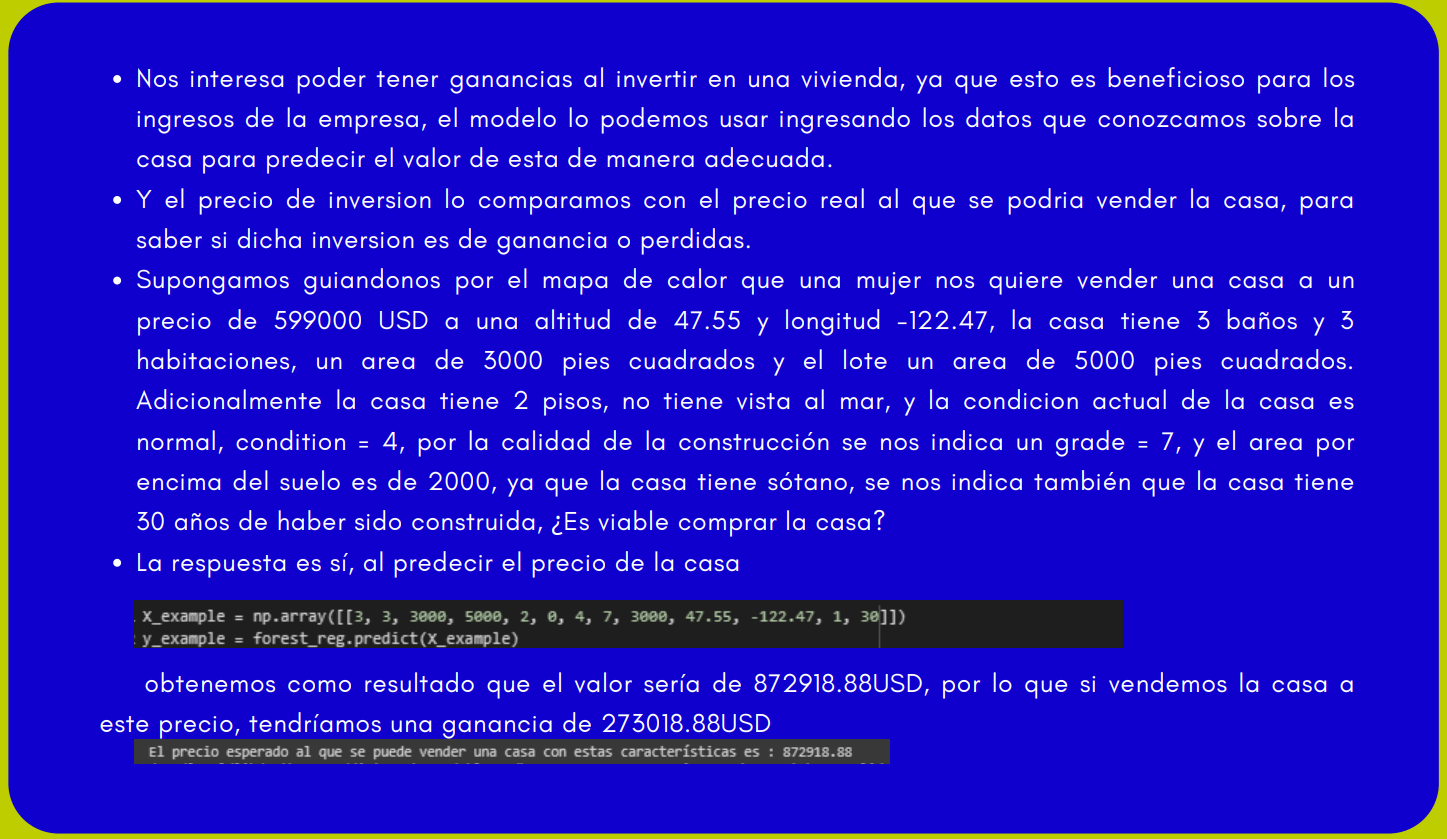